In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import re

In [63]:
retail_path = "data/실물지표/소매판매액지수.csv"
card_path = "data/실물지표/신용카드사용액.csv"
prod_path = "data/실물지표/전산업생산지수.csv"

# 로드
retail = pd.read_csv(retail_path)
card = pd.read_csv(card_path)
prod = pd.read_csv(prod_path)

In [66]:
# 날짜 컬럼 datetime 변환
retail['date'] = pd.to_datetime(retail['date'])
card['date'] = pd.to_datetime(card['date'])
prod['date'] = pd.to_datetime(prod['date'])

# 필요한 컬럼만 선택 (예시: yoy_z_full 사용)
retail = retail[['date', 'yoy_z']].rename(columns={'yoy_z': 'retail'})
card = card[['date', 'yoy_z']].rename(columns={'yoy_z': 'card'})
prod = prod[['date', 'yoy_z']].rename(columns={'yoy_z': 'production'})


In [67]:
start_date = "2011-01-01"

retail = retail[retail['date'] >= start_date]
card = card[card['date'] >= start_date]
prod = prod[prod['date'] >= start_date]

In [69]:
df_real = retail.merge(card, on='date', how='inner').merge(prod, on='date', how='inner')

df_real = df_real.sort_values('date')


In [129]:
df_real['real_index'] = df_real[['retail', 'card', 'production']].mean(axis=1)
df_real.to_csv('data/실물지표/실물지표계산.csv')

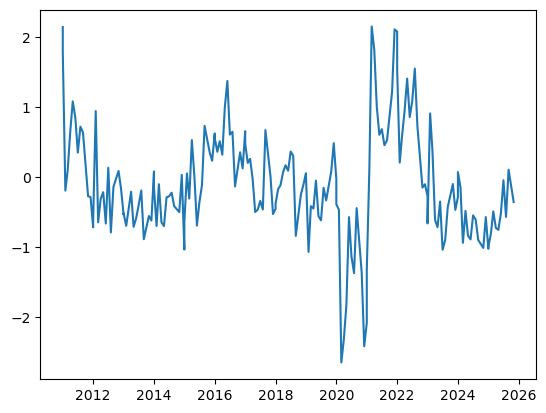

In [82]:
plt.plot(df_real['date'],df_real['real_index'])

# 금융지표

## 코스피

In [125]:
import pandas as pd
import numpy as np

# 1. 데이터 로드
kospi = pd.read_csv("data/금융지표/kospiraw.csv")

# 2. 날짜 정리
kospi['날짜'] = pd.to_datetime(kospi['날짜'])
kospi = kospi.sort_values('날짜')



kospi = kospi.rename(columns={'종가': 'close'})
kospi = kospi.rename(columns={'날짜': 'date'})

kospi['close'] = (
    kospi['close']
      .astype(str)
      .str.replace(',', '', regex=False)
      .str.strip()
)

kospi['close'] = pd.to_numeric(kospi['close'], errors='coerce')

# 로그수익률
kospi['log_return'] = np.log(kospi['close']).diff()

# 12개월 누적 로그수익률
kospi['log_return_12m'] = kospi['log_return'].rolling(12).sum()

# 2011년 이후
#kospi = kospi[kospi['date'] >= "2011-01-01"]

# z-score
kospi['kospi_z'] = (kospi['log_return_12m'] - kospi['log_return_12m'].mean()) / kospi['log_return_12m'].std()
kospi[['date','close','log_return','log_return_12m','kospi_z']].head(15)

kospi.to_csv('data/금융지표/kospi.csv',encoding='utf-8-sig')
kospi

,date,close,시가,고가,저가,거래량,변동 %,log_return,log_return_12m,kospi_z
193,2010-01-01,1602.43,"1,681.71","1,723.22","1,595.39",9.20B,-4.77%,NaN,NaN,NaN
192,2010-02-01,1594.58,"1,603.87","1,631.71","1,548.78",7.22B,-0.49%,-0.004911,NaN,NaN
191,2010-03-01,1692.85,"1,612.43","1,705.57","1,608.97",9.20B,6.16%,0.059803,NaN,NaN
190,2010-04-01,1741.56,"1,695.30","1,757.76","1,695.30",9.31B,2.88%,0.028368,NaN,NaN
189,2010-05-01,1641.25,"1,735.68","1,740.15","1,532.68",7.58B,-5.76%,-0.059323,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4,2025-10-01,4107.50,"3,444.06","4,146.72","3,440.42",8.66B,19.94%,0.181830,0.474312,2.444099
3,2025-11-01,3926.59,"4,123.36","4,226.75","3,833.35",7.30B,-4.40%,-0.045043,0.469274,2.415378
2,2025-12-01,4214.17,"3,967.92","4,226.36","3,892.08",8.41B,7.32%,0.070681,0.563196,2.950792
1,2026-01-01,5224.36,"4,224.53","5,321.68","4,216.68",11.55B,23.97%,0.214880,0.730118,3.902343


## 환율

In [131]:
exchange = pd.read_csv('data/금융지표/exchangeraw.csv')
exchange = exchange[['날짜','종가']]
exchange['날짜'] = pd.to_datetime(exchange['날짜'])
exchange = exchange.sort_values('날짜')
exchange = exchange.rename(columns={'종가': 'close'})
exchange = exchange.rename(columns={'날짜': 'date'})

exchange['close'] = (
    exchange['close']
      .astype(str)
      .str.replace(',', '', regex=False)
      .str.strip()
)

exchange['close'] = pd.to_numeric(kospi['close'], errors='coerce')

# 로그수익률
exchange['log_return'] = np.log(kospi['close']).diff()

# 12개월 누적 로그수익률
exchange['log_return_12m'] = exchange['log_return'].rolling(12).sum()

# z-score
exchange['exchange_z'] = (exchange['log_return_12m'] - exchange['log_return_12m'].mean()) / exchange['log_return_12m'].std()
exchange['exchange_z'] = -exchange['exchange_z']
exchange[['date','close','log_return','log_return_12m','exchange_z']].head(15)

exchange.to_csv('data/금융지표/exchange.csv',encoding='utf-8-sig')
exchange

,date,close,log_return,log_return_12m,exchange_z
193,2010-01-01,1602.43,NaN,NaN,NaN
192,2010-02-01,1594.58,-0.004911,NaN,NaN
191,2010-03-01,1692.85,0.059803,NaN,NaN
190,2010-04-01,1741.56,0.028368,NaN,NaN
189,2010-05-01,1641.25,-0.059323,NaN,NaN
...,...,...,...,...,...
4,2025-10-01,4107.50,0.181830,0.474312,-2.444099
3,2025-11-01,3926.59,-0.045043,0.469274,-2.415378
2,2025-12-01,4214.17,0.070681,0.563196,-2.950792
1,2026-01-01,5224.36,0.214880,0.730118,-3.902343


## 금리

In [146]:
df = pd.read_csv('data/금융지표/interestraw.csv')

# 1) 메타 컬럼 / 날짜 컬럼 분리
meta_cols = ["계정항목", "단위"]
date_cols = [c for c in df.columns if c not in meta_cols]

# 2) wide -> long
long = df.melt(
    id_vars=meta_cols,
    value_vars=date_cols,
    var_name="date",
    value_name="yield"
)

# 3) 날짜 파싱: '2010/01' 또는 'Jan-10' 모두 대응
s = long["date"].astype(str)


mask_ym = s.str.match(r"^\d{4}/\d{2}$")        # 2010/01
mask_mon = s.str.match(r"^[A-Za-z]{3}-\d{2}$") # Jan-10

long.loc[mask_ym, "date"]  = pd.to_datetime(s[mask_ym],  format="%Y/%m")
long.loc[mask_mon, "date"] = pd.to_datetime(s[mask_mon], format="%b-%y")

# 4) 금리 숫자 변환
long["yield"] = (
    long["yield"].astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
)
long["yield"] = pd.to_numeric(long["yield"], errors="coerce")

# 5) 피벗: 날짜별로 국고채/회사채를 한 행에
wide = long.pivot(index="date", columns="계정항목", values="yield").sort_index()

# 6) 스프레드 & z-score (2011-01 이후 기준)
gov_col  = "국고채(3년)"
corp_col = "회사채(3년, AA-)"

rate = wide[[gov_col, corp_col]].copy()
rate["spread"] = rate[corp_col] - rate[gov_col]

rate = rate[rate.index >= "2011-01-01"].copy()

mu = rate["spread"].mean()
sd = rate["spread"].std(ddof=1)

rate["spread_z"] = (rate["spread"] - mu) / sd

# 금융 '강세' 지수에 넣을 거면 (스프레드↑ = 악화) 부호 반대로 쓰는 게 보통
rate["spread_z"] = -rate["spread_z"]

rate.reset_index()
rate.to_csv('data/금융지표/interest.csv',encoding='utf-8-sig')

# 금융지표 계산

In [166]:
interest = pd.read_csv('data/금융지표/interest.csv')
kospi = pd.read_csv('data/금융지표/kospi.csv')
exchange = pd.read_csv('data/금융지표/exchange.csv')

In [167]:
# 날짜 컬럼 datetime 변환
interest['date'] = pd.to_datetime(interest['date'])
kospi['date'] = pd.to_datetime(kospi['date'])
exchange['date'] = pd.to_datetime(exchange['date'])

# 필요한 컬럼만 선택 (예시: yoy_z_full 사용)
interest = interest[['date', 'spread_z']].rename(columns={'spread_z': 'interest'})
kospi = kospi[['date', 'kospi_z']].rename(columns={'kospi_z': 'kospi'})
exchange = exchange[['date', 'exchange_z']].rename(columns={'exchange_z': 'exchange'})


In [168]:
start_date = "2011-01-01"

interest = interest[interest['date'] >= start_date]
kospi = kospi[kospi['date'] >= start_date]
exchange = exchange[exchange['date'] >= start_date]

In [169]:
df_fin = interest.merge(kospi, on='date', how='inner').merge(exchange, on='date', how='inner')

df_fin = df_fin.sort_values('date')


In [170]:
df_fin['fin_index'] = df_real[['interest', 'kospi', 'exchange']].mean(axis=1)
df_fin.to_csv('data/금융지표/금융지표계산.csv')

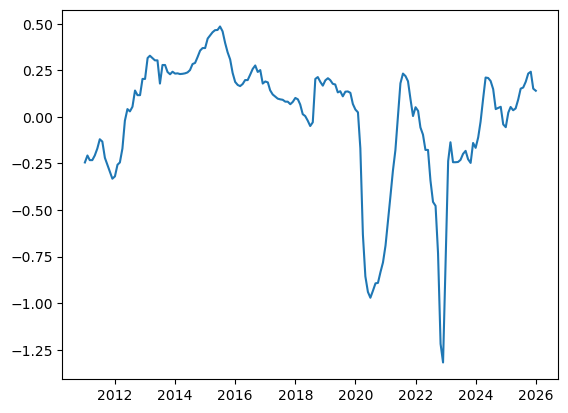

In [171]:
plt.plot(df_real['date'],df_real['real_index'])

# 디커플링 지수 계산

In [221]:
실물 = pd.read_csv('data/실물지표/실물지표계산.csv')
금융 = pd.read_csv('data/금융지표/금융지표계산.csv')

실물_score = 실물['real_index']
금융_score = 금융['fin_index']

df = pd.merge(
    실물[['date','real_index']],
    금융[['date','fin_index']],  # 실제 금융 컬럼명으로 수정
    on='date',
    how='inner'
)

df = df.sort_values('date')


In [222]:
df['decoupling'] = df['fin_index'] - df['real_index']
df['decoupling'].describe()

count    179.000000
mean       0.107356
std        0.816594
min       -2.587499
25%       -0.346653
50%        0.258557
75%        0.684764
max        2.478476
Name: decoupling, dtype: float64

In [223]:
df.to_csv('data/decoupling.csv')

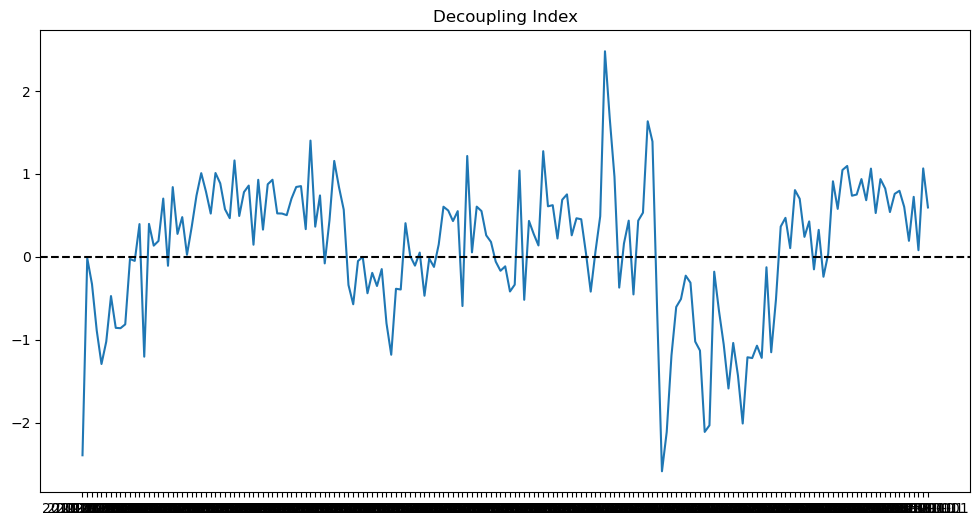

In [224]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['decoupling'])
plt.axhline(0, color='black', linestyle='--')
plt.title('Decoupling Index')
plt.savefig('wow.png')
plt.show()

In [227]:
df['date'] = pd.to_datetime(df['date'])


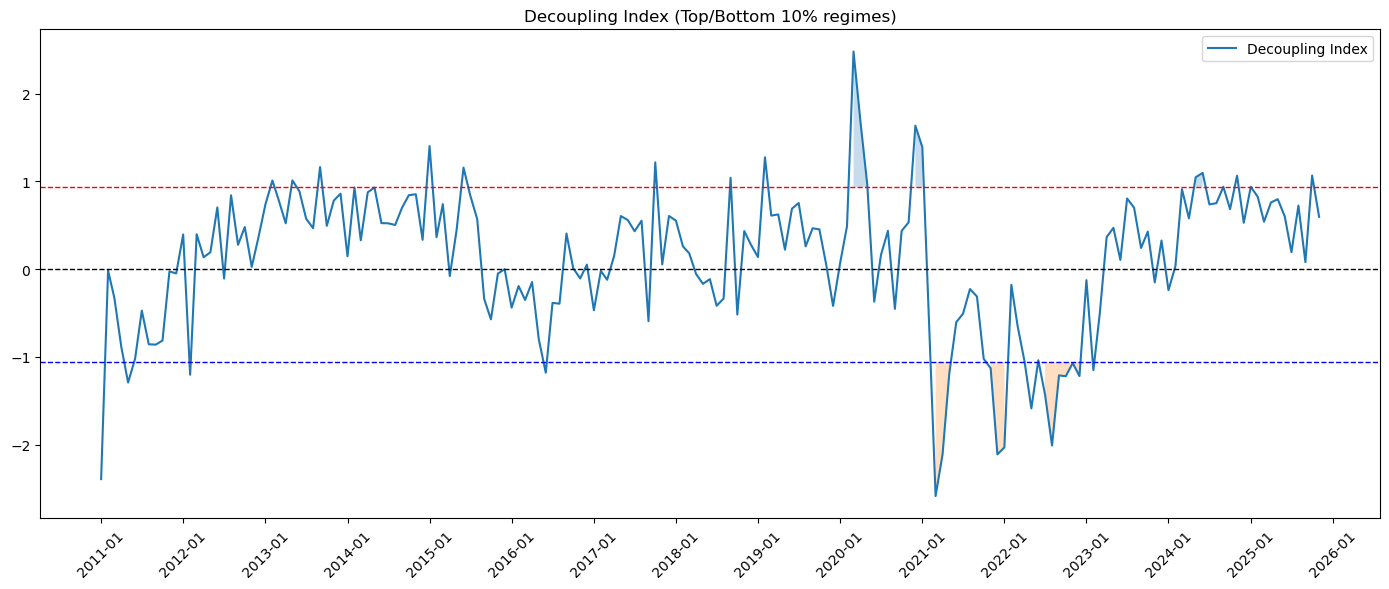

In [228]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = df.sort_values('date')

upper = df['decoupling'].quantile(0.90)
lower = df['decoupling'].quantile(0.10)

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df['date'], df['decoupling'], label='Decoupling Index')

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.axhline(upper, color='red', linestyle='--', linewidth=1)
ax.axhline(lower, color='blue', linestyle='--', linewidth=1)

ax.fill_between(df['date'], df['decoupling'], upper,
                where=(df['decoupling'] > upper),
                alpha=0.25)

ax.fill_between(df['date'], df['decoupling'], lower,
                where=(df['decoupling'] < lower),
                alpha=0.25)

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

ax.set_title('Decoupling Index (Top/Bottom 10% regimes)')
ax.legend()
plt.tight_layout()
plt.show()
